In [1]:
! nvidia-smi

Sat Jul 22 05:19:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

The command is using curl to download a zip file from the specified URL ("https://app.roboflow.com/ds/OWvzhWRFG9?key=763i2VuL4n") and then unzipping the contents of the downloaded file. After unzipping, it removes the downloaded zip file.

In [2]:


!curl -L "https://app.roboflow.com/ds/OWvzhWRFG9?key=763i2VuL4n" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   892  100   892    0     0   1334      0 --:--:-- --:--:-- --:--:--  1333
100 4734k  100 4734k    0     0  1889k      0  0:00:02  0:00:02 --:--:-- 4306k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/_annotations.coco.json  
 extracting: test/barking-Dobermann-dog-image_18_jpeg.rf.ae41fb73bb254f0dd35194a074c1fb4c.jpg  
 extracting: test/barking-Dobermann-dog-image_6_jpeg.rf.29258d59f4a5c9eb93c16a24e7b5feb2.jpg  
 extracting: test/bull-dog-eating-image_33_jpeg.rf.ae11058680b4b1eaa32a929391b83b65.jpg  
 extracting: test/bull-dog-image_26_jpeg.rf.a69a40b44d2b56e2632a91d77f3ee93a.jpg  
 extracting: test/bull-dog-image_3_jpeg.rf.893215cc5fd72756e71cfb674422aa3c.jpg  
 extracting: test/bull-dog-image_40_jpeg.rf.42a5a1dba262c506fa2645d2fbc7b5e6.

# Installing Libraries

In [3]:
!python -m pip install pyyaml==5.1
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.1-cp310-cp310-linux_x86_64.whl size=44090 sha256=b97af9206001e1d57c05acd1f68280fde71deda85e5f18982705a0000461192d
  Stored in directory: /root/.cache/pip/wheels/70/83/31/975b737609aba39a4099d471d5684141c1fdc3404f97e7f68a
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0.1
    Uninstalling PyYAML-6.0.1:
      Successfully uninstalled PyYAML-6.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.12.1 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
flax 0.7.0 requires PyYAML>=5.4.1, but you have pyyaml 5.1 which is incompatible.
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-4b8jc21

The code snippet checks the versions of PyTorch, CUDA, and Detectron2 installed in your Python environment. It uses Python code and the nvcc command to get this information. Let's break down each part of the code:

import torch and import detectron2:
These lines import the torch and detectron2 packages into your Python environment. torch is the PyTorch library used for deep learning, and detectron2 is the Detectron2 library for object detection and other computer vision tasks.

!nvcc --version:
This line executes the nvcc --version command in the Jupyter Notebook or IPython environment using the exclamation mark (!). nvcc is the NVIDIA CUDA Compiler, and this command will display the version information of CUDA installed on your system. Note that this command will only work if you have NVIDIA GPU drivers and CUDA installed.

TORCH_VERSION = ".".join(torch.__version__.split(".")[:2]) and CUDA_VERSION = torch.__version__.split("+")[-1]:
These lines extract the major and minor versions of PyTorch (e.g., "1.9") and the CUDA version from the PyTorch version string. For example, if your PyTorch version is "1.9.0+cu102", TORCH_VERSION will be "1.9", and CUDA_VERSION will be "cu102".

print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION):
This line prints the version of PyTorch and the CUDA version extracted from the previous steps.

print("detectron2:", detectron2.__version__):
This line prints the version of Detectron2 installed in your Python environment.

After run this this code, it will display the versions of PyTorch, CUDA, and Detectron2 in the output, if all the dependencies are properly installed and accessible. Note that to execute the nvcc command successfully, you need to have an NVIDIA GPU with the appropriate drivers and CUDA installed on your system. If you are using a CPU-only version of PyTorch, the CUDA version will not be displayed.

In [4]:
import torch
import detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.0 ; cuda:  cu118
detectron2: 0.6


# Import Library

In [5]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Data Preparation

### Change your dataset name and path of train and test annotation file

The code provided uses Detectron2's register_coco_instances function to register custom datasets for object detection. This function allows you to load datasets in the COCO format and register them with Detectron2's dataset catalog.

Let's break down each line of the code:

from detectron2.data.datasets import register_coco_instances:
This line imports the register_coco_instances function from the Detectron2 library. This function is used to register datasets in the COCO format.

register_coco_instances("dog_dectection_train", {}, "/content/train/_annotations.coco.json", "/content/train/"):
This line registers a custom dataset named "dog_dectection_train" for training. The function takes the following arguments:

"dog_dectection_train": The name of the dataset. This is the identifier used to access the dataset later.
{}: This dictionary allows you to specify metadata for the dataset, such as class labels, if available. In this case, it is an empty dictionary, which means there is no additional metadata specified.
"/content/train/_annotations.coco.json": The file path to the COCO-style annotations JSON file for the training dataset. This file contains information about the images, annotations, and class labels.
"/content/train/": The root directory where the images of the training dataset are located.
register_coco_instances("dog_dectection_test", {}, "/content/test/_annotations.coco.json", "/content/test/"):
This line registers a custom dataset named "dog_dectection_test" for testing or evaluation. The arguments are similar to the previous line, but it points to a different JSON file and image directory for the testing dataset.

After registering the datasets, you can access them using their names ("dog_dectection_train" and "dog_dectection_test") in other parts of your code. For example, when training or evaluating an object detection model, you can use these dataset names to specify the training and testing datasets. This allows you to seamlessly load and work with your custom datasets in Detectron2 for your object detection tasks.

In [6]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("dog_dectection_train", {}, "/content/train/_annotations.coco.json", "/content/train/")
register_coco_instances("dog_dectection_test", {}, "/content/test/_annotations.coco.json", "/content/test/")

In the code you provided, you are using Detectron2's MetadataCatalog and DatasetCatalog to access metadata and dataset information for the registered "dog_dectection_train" dataset. These catalogs allow you to access the metadata and dataset splits (e.g., training, validation, testing) you previously registered using the register_coco_instances function.

Let's understand each line of the code:

cat_metadata = MetadataCatalog.get("dog_dectection_train"):
This line retrieves the metadata for the "dog_dectection_train" dataset from the MetadataCatalog. Metadata contains information about the dataset, such as class labels, dataset name, and other settings. You can use cat_metadata to access various properties of the dataset later.

dataset_dicts = DatasetCatalog.get("dog_dectection_train"):
This line retrieves the dataset split (e.g., training data) for the "dog_dectection_train" dataset from the DatasetCatalog. The dataset is represented as a list of dictionaries, where each dictionary contains information about an individual image and its associated annotations (bounding boxes, class labels, etc.). The list dataset_dicts contains these dictionaries, and you can use it to access the image and annotation information for training your object detection model.

After executing these lines of code, you can use cat_metadata and dataset_dicts to access the metadata and training data of the "dog_dectection_train" dataset in your subsequent code. For example, you can loop through dataset_dicts to get the image paths and annotations, visualize the data, or use it for training your Detectron2 object detection model. Similarly, cat_metadata can be used to access metadata properties, such as class labels, which may be useful during training or inference.

In [7]:
cat_metadata = MetadataCatalog.get("dog_dectection_train")
dataset_dicts = DatasetCatalog.get("dog_dectection_train")

WARNING [07/22 05:24:53 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[07/22 05:24:53 d2.data.datasets.coco]: Loaded 160 images in COCO format from /content/train/_annotations.coco.json



This code uses random sampling to display visualizations of four randomly selected images with their annotations from the "dog_dectection_train" dataset. The visualization is done using the Detectron2 Visualizer class and OpenCV's cv2_imshow function, which allows you to display the images in Google Colab.

Let's go through each part of the code:

import random:
This line imports the random module, which is used to perform random sampling.

for d in random.sample(dataset_dicts, 4)::
This loop iterates four times, and at each iteration, it selects a random entry from the dataset_dicts list. The random.sample() function is used for random sampling without replacement, meaning that each selected entry is unique.

img = cv2.imread(d["file_name"]):
This line reads the image file from the "file_name" key in the selected dataset entry d using OpenCV's cv2.imread() function. The image is read as a NumPy array.

visualizer = Visualizer(img[:, :, ::-1], metadata=cat_metadata, scale=0.5):
This line creates an instance of the Visualizer class from Detectron2. The Visualizer class is used to draw visualizations, including bounding boxes and class labels, on the image. The img[:, :, ::-1] expression is used to convert the BGR image format (used by OpenCV) to RGB format.

vis = visualizer.draw_dataset_dict(d):
This line uses the Visualizer instance to draw annotations on the selected image. The annotations for the image are obtained from the dataset entry d using the draw_dataset_dict() method.

cv2_imshow(vis.get_image()[:, :, ::-1]):
This line displays the visualization using the cv2_imshow() function from Google Colab patches. The get_image() method of the Visualizer instance returns the annotated image in RGB format, which is then displayed using cv2_imshow().

By executing this code, you will see four random images from the "dog_dectection_train" dataset, with their annotations (bounding boxes and class labels) displayed in the notebook. This helps you visually inspect and verify the correctness of the annotations in your dataset before using it for training an object detection model.

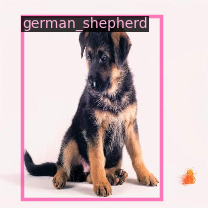

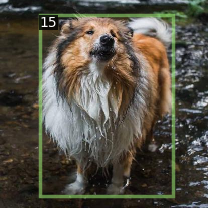

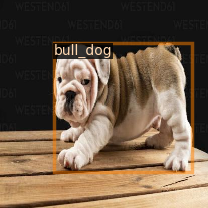

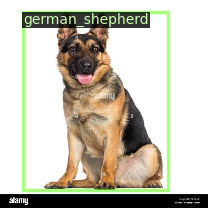

In [8]:
import random

for d in random.sample(dataset_dicts, 4):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=cat_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

# Model Training

### Adjust parameters accoring to you ,and use model as per your preference also change the number of classes and epoch as per usecase

This code sets up the configuration for training a Faster R-CNN model using Detectron2. It configures the hyperparameters, model architecture, and training settings, and then initializes the trainer to begin the training process.

Let's go through each part of the code:

from detectron2.engine import DefaultTrainer:
This line imports the DefaultTrainer class from Detectron2, which is used for training object detection models.

cfg_r_101f = get_cfg():
This line creates a new configuration (cfg_r_101f) using get_cfg(). The configuration is a set of settings that define how the model will be trained.

cfg_r_101f.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml")):
This line loads the Faster R-CNN model configuration from the Detectron2 model zoo. It sets the default hyperparameters and model architecture for the Faster R-CNN model.

cfg_r_101f.DATASETS.TRAIN = ("dog_dectection_train",) and cfg_r_101f.DATASETS.TEST = ():
These lines specify the training and testing datasets. In this case, the "dog_dectection_train" dataset is used for training, and no testing dataset is specified.

cfg_r_101f.DATALOADER.NUM_WORKERS = 2:
This line sets the number of workers used for data loading during training. Increasing the number of workers can speed up data loading but may require more memory.

cfg_r_101f.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml"):
This line initializes the model's weights using the weights from the model zoo. The weights are pre-trained on the COCO dataset and will be used to initialize the model before training.

cfg_r_101f.SOLVER.IMS_PER_BATCH = 4 and cfg_r_101f.SOLVER.BASE_LR = 0.0025:
These lines set the number of images per batch and the base learning rate for the training.

cfg_r_101f.SOLVER.MAX_ITER = 300 and cfg_r_101f.SOLVER.STEPS = []:
These lines set the maximum number of training iterations and define the steps for learning rate decay. In this case, no learning rate decay is used.

cfg_r_101f.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 200 and cfg_r_101f.MODEL.ROI_HEADS.NUM_CLASSES = 5:
These lines set the batch size per image and the number of classes for the ROI heads (the final layer of the model).

os.makedirs(cfg_r_101f.OUTPUT_DIR, exist_ok=True):
This line creates the output directory to store the training results, including model checkpoints and logs.

trainer = DefaultTrainer(cfg_r_101f):
This line initializes the trainer using the configured settings.

trainer.resume_or_load(resume=False):
This line specifies whether to resume training from a previous checkpoint (True) or start training from scratch (False). In this case, training starts from scratch.

trainer.train():
This line starts the training process. The model will be trained on the specified training dataset using the defined hyperparameters and settings.

After executing this code, the Faster R-CNN model will be trained on the "dog_dectection_train" dataset with the specified configuration and settings. The training process will run for the specified number of iterations (MAX_ITER) or until you stop the execution. The training progress, including loss and other metrics, will be displayed in the output. The trained model and other training artifacts will be saved in the specified output directory.

In [9]:
from detectron2.engine import DefaultTrainer

cfg_r_101f = get_cfg()
cfg_r_101f.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml"))
cfg_r_101f.DATASETS.TRAIN = ("dog_dectection_train",)
cfg_r_101f.DATASETS.TEST = ()
cfg_r_101f.DATALOADER.NUM_WORKERS = 2
#cfg_r_101f.MODEL.WEIGHTS = "output/model_final.pth"
cfg_r_101f.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml")  # Let training initialize from model zoo
cfg_r_101f.SOLVER.IMS_PER_BATCH = 4
cfg_r_101f.SOLVER.BASE_LR = 0.0025  # pick a good LR
cfg_r_101f.SOLVER.MAX_ITER = 300   # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg_r_101f.SOLVER.STEPS = []        # do not decay learning rate
cfg_r_101f.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 200   # faster, and good enough for this toy dataset (default: 512)
cfg_r_101f.MODEL.ROI_HEADS.NUM_CLASSES = 5  # only has one class (ballon).

os.makedirs(cfg_r_101f.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg_r_101f)
trainer.resume_or_load(resume=False)
trainer.train()

[07/22 05:25:05 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_b275ba.pkl: 167MB [00:01, 164MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[07/22 05:25:06 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[07/22 05:25:22 d2.utils.events]:  eta: 0:02:51  iter: 19  total_loss: 1.71  loss_cls: 1.363  loss_box_reg: 0.35  loss_rpn_cls: 0.002642  loss_rpn_loc: 0.004029    time: 0.6329  last_time: 0.6279  data_time: 0.0374  last_data_time: 0.0311   lr: 0.00016068  max_mem: 3059M
[07/22 05:25:37 d2.utils.events]:  eta: 0:02:34  iter: 39  total_loss: 0.6769  loss_cls: 0.3217  loss_box_reg: 0.351  loss_rpn_cls: 0.002  loss_rpn_loc: 0.003501    time: 0.6109  last_time: 0.6434  data_time: 0.0192  last_data_time: 0.0236   lr: 0.00032718  max_mem: 3061M
[07/22 05:25:50 d2.utils.events]:  eta: 0:02:26  iter: 59  total_loss: 0.5775  loss_cls: 0.2285  loss_box_reg: 0.34  loss_rpn_cls: 0.0009257  loss_rpn_loc: 0.003508    time: 0.6088  last_time: 0.5742  data_time: 0.0242  last_data_time: 0.0240   lr: 0.00049367  max_mem: 3061M
[07/22 05:26:02 d2.utils.events]:  eta: 0:02:15  iter: 79  total_loss: 0.5485  loss_cls: 0.2058  loss_box_reg: 0.3274  loss_rpn_cls: 0.001186  loss_rpn_loc: 0.004203    time: 0.61

# Loading Trained Model

### Adjust the threshold as per your need

This code sets up the configuration for inference using the Faster R-CNN model that was trained using Detectron2. It modifies the configuration from the training phase to use the model checkpoint file that was generated during training. Additionally, it sets a custom threshold for filtering detections during testing.

Let's go through each part of the code:

cfg_r_101f.MODEL.WEIGHTS = os.path.join(cfg_r_101f.OUTPUT_DIR, "model_final.pth"):
This line sets the path to the trained model's checkpoint file (model_final.pth) in the configuration (cfg_r_101f). The model checkpoint file contains the learned weights and parameters of the trained model. The path is constructed using os.path.join() to combine the output directory (cfg_r_101f.OUTPUT_DIR) with the filename of the model checkpoint.

cfg_r_101f.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6:
This line sets a custom testing threshold for the region of interest (ROI) heads during inference. The ROI heads generate region proposals and classify objects based on the objectness score. By setting this threshold to 0.6, only detections with a confidence score greater than or equal to 0.6 will be considered as valid detections during inference.

predictor = DefaultPredictor(cfg_r_101f):
This line creates the inference predictor using the modified configuration (cfg_r_101f). The predictor is an instance of DefaultPredictor from Detectron2, which is used for performing inference on images using the trained Faster R-CNN model.

After executing this code, you will have a predictor object that can be used to perform inference on images using the trained Faster R-CNN model. The threshold for object detection during testing is set to 0.6, but you can modify it to any desired value based on your application's requirements. The predictor can be used to obtain object detection results, including bounding boxes and class labels, on new images not seen during training.

In [10]:
# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
cfg_r_101f.MODEL.WEIGHTS = os.path.join(cfg_r_101f.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg_r_101f.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6  # set a custom testing threshold
predictor = DefaultPredictor(cfg_r_101f)

[07/22 05:28:33 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


# Testing Model

### Change the path to your test folder

This code provided performs inference on images from the "/content/test/" directory using the trained Faster R-CNN model (predictor). It visualizes the predicted bounding boxes and class labels on the images and displays them in Google Colab using cv2_imshow.

Let's go through each part of the code:

from detectron2.utils.visualizer import ColorMode:
This line imports the ColorMode class from Detectron2's visualizer module. The ColorMode class provides options for controlling the color mode used in visualizations.

for img in os.listdir("/content/test/")::
This loop iterates over the files in the "/content/test/" directory.

if img[-3:-1] == "jp"::
This line checks if the file extension of the current file is "jpg". It ensures that only image files with the "jpg" extension are considered for inference. The condition should be img[-3:] == "jpg" for the check to be correct.

image = "/content/test/"+img:
This line constructs the full path to the current image file by concatenating the "/content/test/" directory path with the image file name (img).

im = cv2.imread(image):
This line reads the image from the file path using OpenCV's cv2.imread() function. The image is read as a NumPy array.

outputs = predictor(im):
This line performs inference on the current image using the predictor object (the trained Faster R-CNN model). The predictor will generate object detection results, including bounding boxes, class labels, and confidence scores, for the input image.

v = Visualizer(im[:, :, ::-1], metadata=cat_metadata, scale=0.5, instance_mode=ColorMode.IMAGE_BW):
This line creates an instance of the Visualizer class from Detectron2. The Visualizer is used to draw visualizations on the input image. The instance_mode=ColorMode.IMAGE_BW argument sets the color mode to black and white for unsegmented pixels, which is only available for segmentation models.

out = v.draw_instance_predictions(outputs["instances"].to("cpu")):
This line uses the Visualizer instance to draw the instance predictions (bounding boxes and class labels) on the image. The outputs["instances"].to("cpu") converts the model predictions from the GPU to the CPU for visualization.

cv2_imshow(out.get_image()[:, :, ::-1]):
This line displays the visualization of the current image with the drawn bounding boxes and class labels using cv2_imshow() in Google Colab.

By executing this code, you will see the visualizations of object detections on the images from the "/content/test/" directory, with bounding boxes and class labels drawn around the detected objects.**bold text**

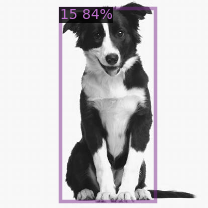

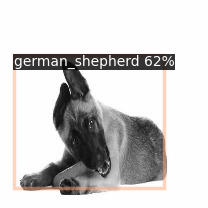

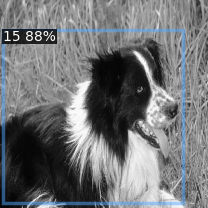

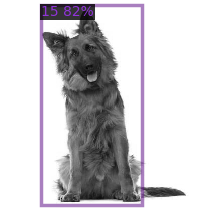

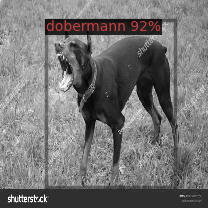

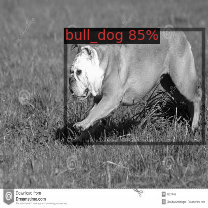

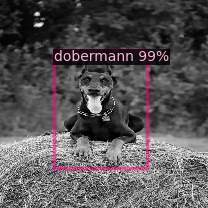

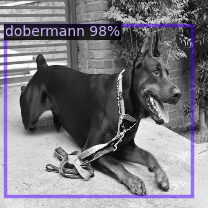

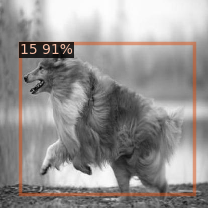

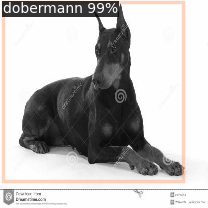

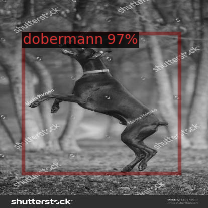

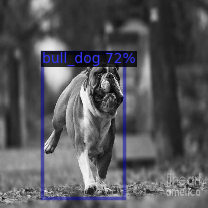

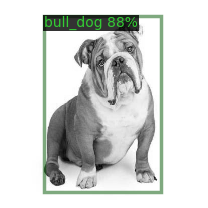

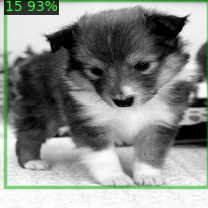

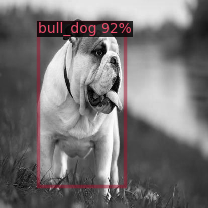

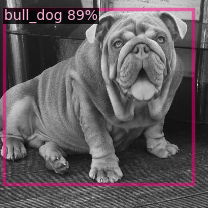

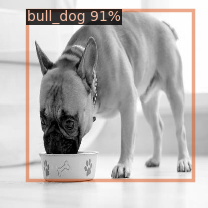

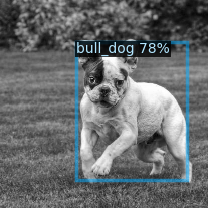

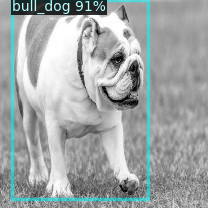

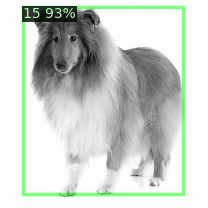

In [11]:
from detectron2.utils.visualizer import ColorMode
for img in os.listdir("/content/test/"):
  if img[-3:-1] == "jp":
    image = "/content/test/"+img
    im = cv2.imread(image)
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata=cat_metadata,
                   scale=0.5,
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])

# Model Evaluation Metrics

This code performs evaluation of the trained Faster R-CNN model on the "dog_dectection_test" dataset using Detectron2's evaluation utilities.

Let's go through each part of the code:

from detectron2.evaluation import COCOEvaluator, inference_on_dataset and from detectron2.data import build_detection_test_loader:
These lines import the necessary modules and functions from Detectron2 for evaluation.

evaluator = COCOEvaluator("dog_dectection_test"):
This line creates an instance of the COCOEvaluator class, which is used for evaluating object detection performance on the "dog_dectection_test" dataset. The COCOEvaluator is designed to evaluate results in the COCO evaluation format.

val_loader = build_detection_test_loader(cfg_r_101f, "dog_dectection_test"):
This line creates a test data loader for the "dog_dectection_test" dataset using the configuration (cfg_r_101f) and dataset name. The test data loader is used to load test images and their annotations for evaluation.

print(inference_on_dataset(trainer.model, val_loader, evaluator)):
This line calls the inference_on_dataset function to perform inference on the test dataset using the trained Faster R-CNN model (trainer.model). The function takes the model, test data loader (val_loader), and the evaluator (evaluator) as inputs. It returns a dictionary containing the evaluation results, such as mean average precision (mAP) and other metrics.

Note: In this line of code, trainer.model is used, which means that it evaluates the model after training. If you want to evaluate the model using the saved weights from the checkpoint, you should create a new model using the configuration, load the weights from the checkpoint, and pass that model to inference_on_dataset.

# another equivalent way to evaluate the model is to use trainer.test:
This comment suggests an alternative way to evaluate the model using trainer.test(). The test() method of the DefaultTrainer class also performs evaluation on the testing dataset and prints evaluation results, including mAP and other metrics.

By executing this code, you will evaluate the trained Faster R-CNN model on the "dog_dectection_test" dataset and print the evaluation results, including mAP, precision, recall, and other performance metrics. The evaluation will use the ground truth annotations from the test dataset and compare them with the model's predictions to assess the object detection performance.

In [12]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("dog_dectection_test")
val_loader = build_detection_test_loader(cfg_r_101f, "dog_dectection_test")
print(inference_on_dataset(trainer.model, val_loader, evaluator))
# another equivalent way to evaluate the model is to use `trainer.test`

WARNING [07/22 05:29:00 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[07/22 05:29:00 d2.data.datasets.coco]: Loaded 20 images in COCO format from /content/test/_annotations.coco.json
[07/22 05:29:00 d2.data.build]: Distribution of instances among all 5 categories:
|  category  | #instances   |   category    | #instances   |  category  | #instances   |
|:----------:|:-------------|:-------------:|:-------------|:----------:|:-------------|
|    dog     | 0            |      15       | 5            |  bull_dog  | 8            |
| dobermann  | 5            | german_shep.. | 2            |            |              |
|   total    | 20           |               |              |            |              |
[07/22 05:29:00 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[07/22 05:29:00 d2.data.common]: Serializi

To evaluate object detection models like R-CNN and YOLO, the mean average precision (mAP) is used. The mAP compares the ground-truth bounding box to the detected box and returns a score. The higher the score, the more accurate the model is in its detections.

Here AP of Bull_dog is 86.153 is considered good.